In [5]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | saravan
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto escondido
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | binghamton
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | gizo
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | limbang
Processing Record 15 of Set 1 | surin
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | mounana
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | port elizabeth
P

Processing Record 39 of Set 4 | tasiilaq
Processing Record 40 of Set 4 | richards bay
Processing Record 41 of Set 4 | laguna
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | alekseyevka
Processing Record 45 of Set 4 | bintulu
Processing Record 46 of Set 4 | half moon bay
Processing Record 47 of Set 4 | lannion
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | mabaruma
Processing Record 50 of Set 4 | prince rupert
Processing Record 1 of Set 5 | sinjah
City not found. Skipping...
Processing Record 2 of Set 5 | ambilobe
Processing Record 3 of Set 5 | aksu
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | muros
Processing Record 8 of Set 5 | urk
Processing Record 9 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 5 | hamilton
Proce

Processing Record 30 of Set 8 | ankang
Processing Record 31 of Set 8 | samusu
City not found. Skipping...
Processing Record 32 of Set 8 | usinsk
Processing Record 33 of Set 8 | leningradskiy
Processing Record 34 of Set 8 | areka
Processing Record 35 of Set 8 | atar
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | oussouye
Processing Record 38 of Set 8 | umm lajj
Processing Record 39 of Set 8 | juybar
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 43 of Set 8 | bakel
Processing Record 44 of Set 8 | huilong
Processing Record 45 of Set 8 | sidney
Processing Record 46 of Set 8 | shelburne
Processing Record 47 of Set 8 | ahipara
Processing Record 48 of Set 8 | mbandaka
Processing Record 49 of Set 8 | klaksvik
Processing Record 50 of Set 8 | dolores
Processing Record 1 of Set 9 | saint-leu
Processing Record 2 of Set 9 | tateyama
Process

Processing Record 19 of Set 12 | mehtar lam
Processing Record 20 of Set 12 | teahupoo
Processing Record 21 of Set 12 | bethalto
Processing Record 22 of Set 12 | waspan
Processing Record 23 of Set 12 | karratha
Processing Record 24 of Set 12 | bathsheba
Processing Record 25 of Set 12 | toliary
City not found. Skipping...
Processing Record 26 of Set 12 | masunga
Processing Record 27 of Set 12 | ballina
Processing Record 28 of Set 12 | kayseri
Processing Record 29 of Set 12 | lamar
Processing Record 30 of Set 12 | dien bien
City not found. Skipping...
Processing Record 31 of Set 12 | coral springs
Processing Record 32 of Set 12 | brasilia de minas
Processing Record 33 of Set 12 | ossora
Processing Record 34 of Set 12 | narrabri
Processing Record 35 of Set 12 | eirunepe
Processing Record 36 of Set 12 | galle
Processing Record 37 of Set 12 | butajira
Processing Record 38 of Set 12 | punta alta
Processing Record 39 of Set 12 | cedar city
Processing Record 40 of Set 12 | sharjah
Processing Re

In [16]:
len(city_data)

552

In [17]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,54.84,91,51,2.13,CL,2020-04-18 23:32:48
1,Punta Arenas,-53.15,-70.92,48.20,66,40,16.11,CL,2020-04-18 23:32:48
2,Saravan,39.72,45.65,50.00,71,85,11.41,AM,2020-04-18 23:32:48
3,Ancud,-41.87,-73.82,55.40,82,90,6.93,CL,2020-04-18 23:32:48
4,Rikitea,-23.12,-134.97,77.41,70,42,5.93,PF,2020-04-18 23:30:43
5,Puerto Escondido,15.85,-97.07,86.00,79,40,6.93,MX,2020-04-18 23:32:49
6,Hermanus,-34.42,19.23,63.00,65,78,3.00,ZA,2020-04-18 23:32:49
7,Binghamton,42.10,-75.92,42.01,59,75,6.93,US,2020-04-18 23:32:49
8,Georgetown,5.41,100.34,80.60,94,40,4.70,MY,2020-04-18 23:32:49
9,Gizo,-8.10,156.84,86.07,65,44,2.35,SB,2020-04-18 23:32:49


In [18]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2020-04-18 23:32:48,-37.62,-73.65,54.84,91,51,2.13
1,Punta Arenas,CL,2020-04-18 23:32:48,-53.15,-70.92,48.20,66,40,16.11
2,Saravan,AM,2020-04-18 23:32:48,39.72,45.65,50.00,71,85,11.41
3,Ancud,CL,2020-04-18 23:32:48,-41.87,-73.82,55.40,82,90,6.93
4,Rikitea,PF,2020-04-18 23:30:43,-23.12,-134.97,77.41,70,42,5.93
...,...,...,...,...,...,...,...,...,...
547,Novobiryusinskiy,RU,2020-04-18 23:34:42,56.96,97.71,27.66,88,0,6.40
548,Aripuana,BR,2020-04-18 23:34:43,-9.17,-60.63,73.20,92,86,0.65
549,Turan,VN,2020-04-18 23:30:32,16.07,108.22,77.00,94,20,3.36
550,Parrita,CR,2020-04-18 23:34:43,9.52,-84.32,80.60,57,40,12.75


In [22]:
# Import the time module
import time
#Get today's date in seconds
today = time.time()
today

1587335726.137242

In [23]:
today = time.strftime("%x")
today

'04/19/20'

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

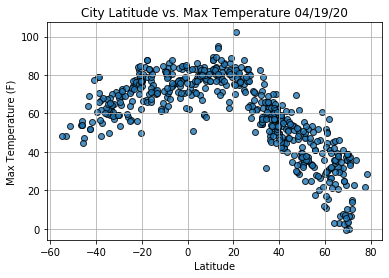

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


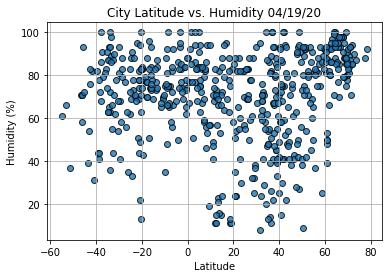

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

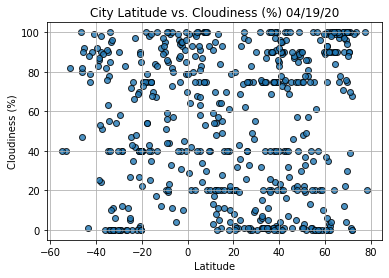

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()